# Assignment Notebook

## Data Visualisation and using statistical learning to answer a business question 



## Part 1: Data Visualisation

### 1.1 Import libraries

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. **2,233** respondents completed the survey.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe.

In [ ]:
#import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# YOUR CODE HERE, TO READ THE DATA FROM THE CSV FILE
Survey_dataset = pd.read_csv("Topic_Survey_Assignment.csv")

In [ ]:
# EXPLORE DATASET 
Survey_dataset.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


### 1.2 Visualisation

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.
To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.

As for the chart:
1. use a figure size of (20, 8),
2. bar width of 0.8,
3. use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
4. use font size 14 for the bar labels, percentages, and legend,
5. use font size 16 for the title, and,
6. display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [ ]:
# Sort the dataframe in descending order of 'Very interested'
Survey_dataset_sorted = Survey_dataset.sort_values(by='Very interested', ascending=False)

In [ ]:
# Convert numbers to percentages of total respondents (2233)and round 0ff to 2 decimal places
total_respondents = 2233
dataset_percentage = Survey_dataset_sorted.copy()
dataset_percentage.iloc[:, 1:] = ((dataset_percentage.iloc[:, 1:] / total_respondents) * 100).round(2)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12012\3434303247.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1    75.59
5    72.95
3    60.01
0    59.65
4    56.56
2    19.21
Name: Very interested, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_percentage.iloc[:, 1:] = ((dataset_percentage.iloc[:, 1:] / total_respondents) * 100).round(2)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12012\3434303247.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1    19.88
5    21.36
3    32.87
0    32.65
4    34.48
2    48.41
Name: Somewhat interested, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_percentage.iloc[:, 1:] = ((dataset_percentage.iloc[:, 1:] / total_respondents) * 100).round(2)
C:\Users\Utilisateur

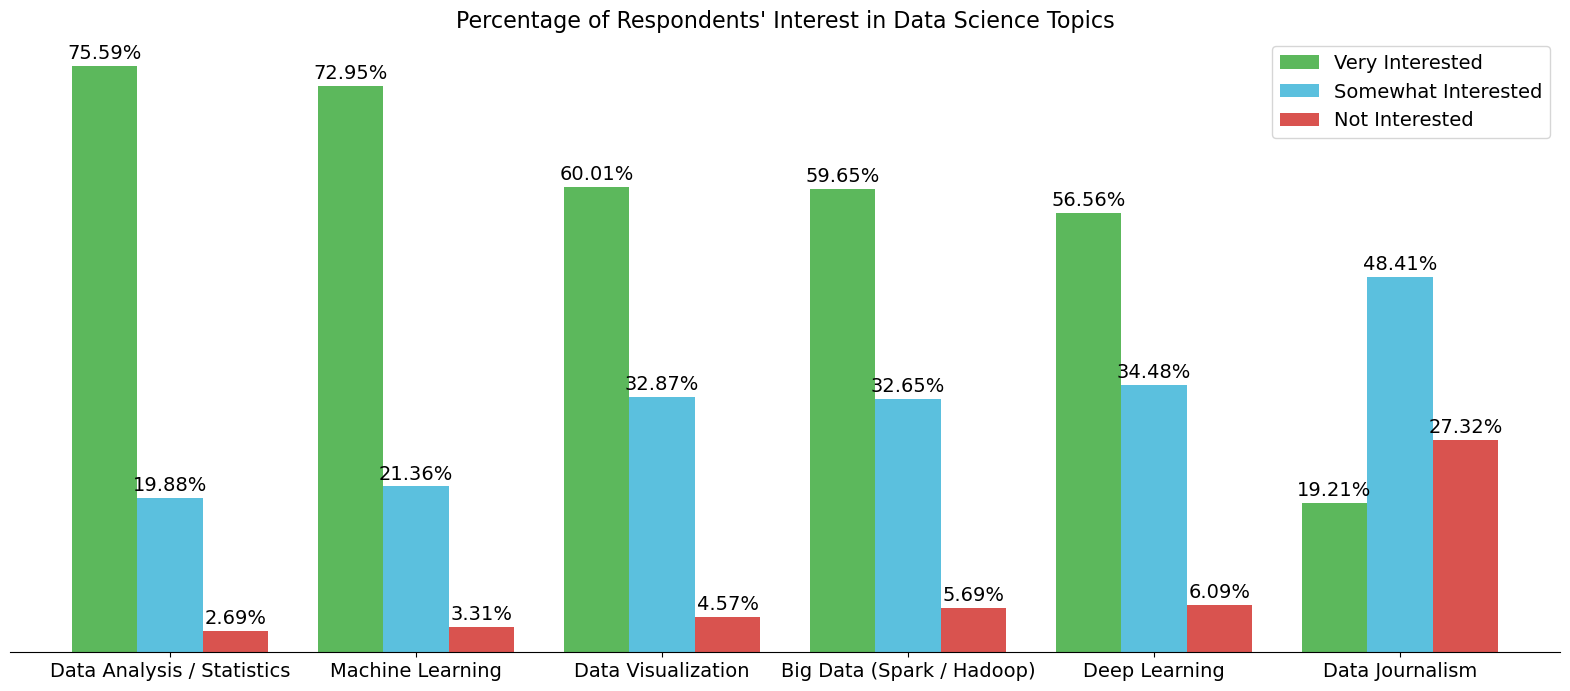

In [ ]:
# Plotting the bar chart using Matplotlib's artist layer
fig, ax = plt.subplots(figsize=(20, 8))

# Bar chart with colors
bar_width = 0.8
colors = ['#5cb85c', '#5bc0de', '#d9534f']

# Plotting the bars for each category
dataset_percentage.plot(kind='bar', width=bar_width, ax=ax, color=colors)

# Adding percentage labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=14)
    
# Customize the chart
ax.set_title('Percentage of Respondents\' Interest in Data Science Topics', fontsize=16)
ax.legend(['Very Interested', 'Somewhat Interested', 'Not Interested'], fontsize=14)
ax.set_xticklabels(dataset_percentage['Unnamed: 0'], rotation=0, fontsize=14)
ax.set_yticks([])

# Remove borders
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


## Part 2: Supervised learning using a tree-based model

### 2.1 Import libraries

In [ ]:
# Import libraries
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For tree-based model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


### 2.2 Import and explore the insurance claim data

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the insurance claim data
claims_dataset = pd.read_csv('ClaimsData.csv')

In [ ]:
# Visualise table 
claims_dataset.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes


In [ ]:
# Explore the size of the data set
print("Size of the dataset:", claims_dataset.shape)

Size of the dataset: (1500, 7)


In [ ]:
# Explore type of data and feature names
print("Data types of columns:")
print(claims_dataset.dtypes)

print("\nFeature names:")
print(claims_dataset.columns)


Data types of columns:
Claim        float64
Category      object
Mileage      float64
AgeP           int64
ModelYear      int64
PreOwned      object
ServHist      object
dtype: object

Feature names:
Index(['Claim', 'Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned',
       'ServHist'],
      dtype='object')


 #### 2.3 Plot the data

**a) Visualise the continuous variables on a scatterplot**

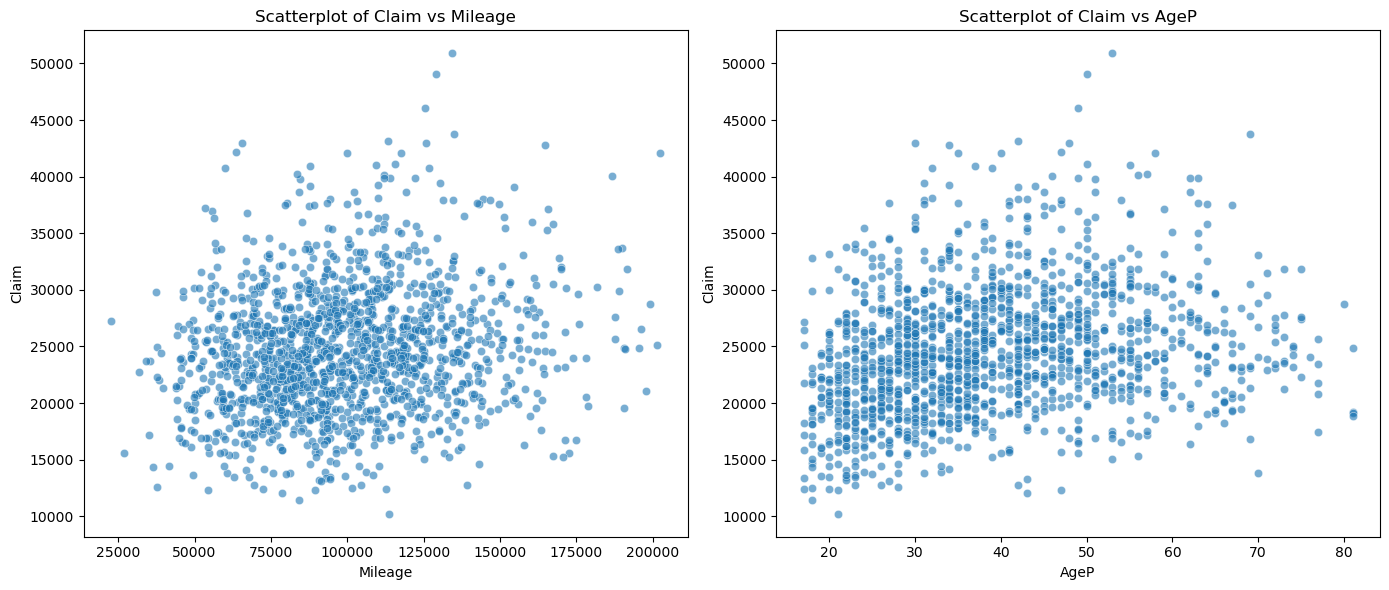

In [ ]:


# Use 'ClaimAmount' as the target variable
y_variable = 'Claim'  

# Plotting scatterplots
# Set the size of the figure
plt.figure(figsize=(14, 6))

# Scatterplot of ClaimAmount vs Mileage
plt.subplot(1, 2, 1)
sns.scatterplot(data=claims_dataset, x='Mileage', y=y_variable, alpha=0.6)
plt.title(f'Scatterplot of {y_variable} vs Mileage')
plt.xlabel('Mileage')
plt.ylabel(y_variable)

# Scatterplot of ClaimAmount vs AgeP
plt.subplot(1, 2, 2)
sns.scatterplot(data=claims_dataset, x='AgeP', y=y_variable, alpha=0.6)
plt.title(f'Scatterplot of {y_variable} vs AgeP')
plt.xlabel('AgeP')
plt.ylabel(y_variable)

# Display the plots
plt.tight_layout()
plt.show()



**b) Compare the mean claim amount for categorical variables**  

In [ ]:
# Calculate the mean claim amount of pre-owned and not pre-owned vehicles

pre_owned = 'PreOwned'  
claim_amount = 'Claim'  

# Check unique values in the 'PreOwned' column to understand its format
print("\nUnique values in the PreOwned column:")
print(claims_dataset[pre_owned].unique())

# Calculate mean claim amount for pre-owned vehicles
mean_claim_pre_owned = claims_dataset[claims_dataset[pre_owned] == 'Yes'][claim_amount].mean()  
# Calculate mean claim amount for not pre-owned vehicles
mean_claim_not_pre_owned = claims_dataset[claims_dataset[pre_owned] == 'No'][claim_amount].mean()  

# Format the mean values to 2 decimal places
mean_claim_pre_owned = round(mean_claim_pre_owned, 2)
mean_claim_not_pre_owned = round(mean_claim_not_pre_owned, 2)

# Display the results
print(f"\nMean claim amount for pre-owned vehicles: {mean_claim_pre_owned}")
print(f"Mean claim amount for not pre-owned vehicles: {mean_claim_not_pre_owned}")


Unique values in the PreOwned column:
['Yes' 'No']

Mean claim amount for pre-owned vehicles: 26987.04
Mean claim amount for not pre-owned vehicles: 23435.09


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12012\3490244113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=claims_dataset, x=pre_owned_column, palette='viridis')


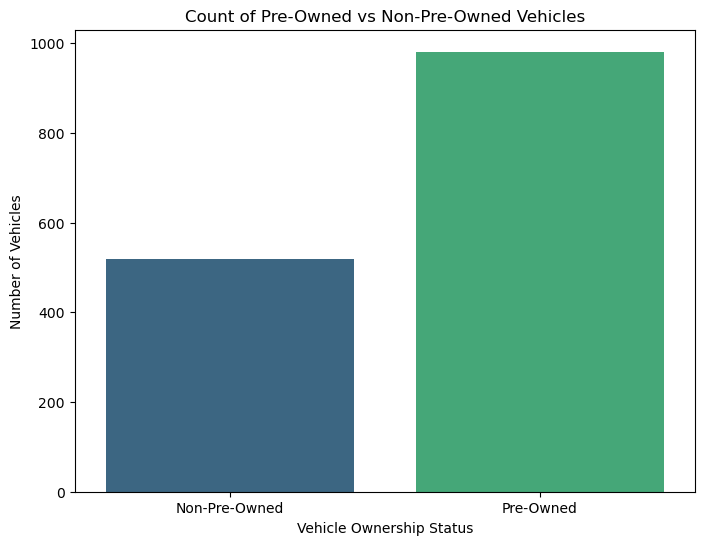

In [ ]:
# Plot the pre-owned vs non-pre-owned vehicles
pre_owned = 'PreOwned'  

# Plotting the count of pre-owned vs non-pre-owned vehicles
plt.figure(figsize=(8, 6))
sns.countplot(data=claims_dataset, x=pre_owned, palette='viridis')
plt.title('Count of Pre-Owned vs Non-Pre-Owned Vehicles')
plt.xlabel('Vehicle Ownership Status')
plt.ylabel('Number of Vehicles')
plt.xticks([0, 1], ['Non-Pre-Owned', 'Pre-Owned'])  
plt.show()

In [ ]:
# Calculate the mean claim amount of vehicles with and without service histories
service_history = 'ServHist'  
claim_amount = 'Claim'  

# Check unique values in the ServiceHistory column 
print("\nUnique values in the ServiceHistory column:")
print(claims_dataset[service_history].unique())

# Calculate mean claim amount for vehicles with service histories
mean_claim_with_service = claims_dataset[claims_dataset[service_history] == 'Yes'][claim_amount].mean()  

# Calculate mean claim amount for vehicles without service histories
mean_claim_without_service = claims_dataset[claims_dataset[service_history] == 'No'][claim_amount].mean()  

# Format the mean values to 2 decimal places
mean_claim_with_service = round(mean_claim_with_service, 2)
mean_claim_without_service = round(mean_claim_without_service, 2)

# Display the results
print(f"\nMean claim amount for vehicles with service history: {mean_claim_with_service:.2f}")
print(f"Mean claim amount for vehicles without service history: {mean_claim_without_service:.2f}")


Unique values in the ServiceHistory column:
['Yes' 'No']

Mean claim amount for vehicles with service history: 24780.54
Mean claim amount for vehicles without service history: 24368.47


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12012\3671749725.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_claims, x=service_history_column, y=claim_amount_column, palette='viridis')


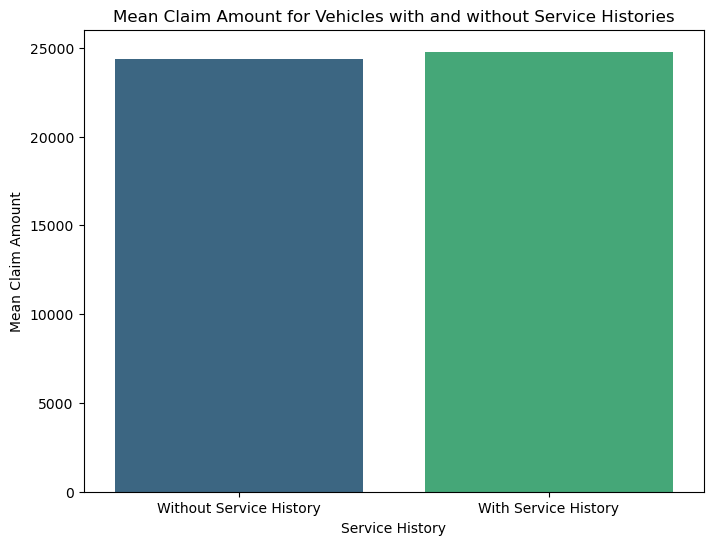

In [ ]:
# Plot the mean claim amount of vehicles with and without service histories
service_history = 'ServHist'  
claim_amount= 'Claim'  

# Calculate mean claim amounts based on service history
mean_claims = claims_dataset.groupby(service_history)[claim_amount].mean().reset_index()

# Format mean values to 2 decimal places for clarity
mean_claims[claim_amount] = mean_claims[claim_amount].round(2)

# Plotting mean claim amount for vehicles with and without service histories
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_claims, x=service_history, y=claim_amount, palette='viridis')
plt.title('Mean Claim Amount for Vehicles with and without Service Histories')
plt.xlabel('Service History')
plt.ylabel('Mean Claim Amount')
plt.xticks([0, 1], ['Without Service History', 'With Service History'])  
plt.show()


In [ ]:
# Calculate the mean claim amount of vehicles in each category
vehicle_category = 'Category'  
claim_amount = 'Claim'  

# Calculate mean claim amounts for each vehicle category
mean_claims_by_category = claims_dataset.groupby(vehicle_category)[claim_amount].mean().reset_index()

# Format the mean values to 2 decimal places for clarity
mean_claims_by_category[claim_amount] = mean_claims_by_category[claim_amount].round(2)

# Display the results
print("\nMean Claim Amount by Vehicle Category:")
print(mean_claims_by_category)


Mean Claim Amount by Vehicle Category:
  Category     Claim
0      SAV  25567.22
1      SUV  29439.96
2    Sedan  23759.34
3    Small  21458.09
4    Super  33107.50


In [ ]:
# Calculate the mean claim amount of vehicles for each model year
model_year = 'ModelYear'  
claim_amount = 'Claim'  

# Calculate mean claim amounts for each model year
mean_claims_by_year = claims_dataset.groupby(model_year)[claim_amount].mean().reset_index()

# Format the mean values to 2 decimal places for clarity
mean_claims_by_year[claim_amount] = mean_claims_by_year[claim_amount].round(2)

# Display the results
print("\nMean Claim Amount by Vehicle Model Year:")
print(mean_claims_by_year)


Mean Claim Amount by Vehicle Model Year:
   ModelYear     Claim
0       2011  21251.20
1       2012  22089.08
2       2013  22797.42
3       2014  24559.40
4       2015  24396.63
5       2016  24930.40
6       2017  24859.32
7       2018  24844.63
8       2019  25487.11


### Insights Drawn From Graphs

1. In the exploratory data analysis, several graphs and calculations were provided: two scatterplots, two bar graphs, and two calculations without graphs. What insight can you draw from these? In your answer, give a short interpretation for two graphs or calculations. For example, are there cars with a particular mileage that have larger claims? Are the mean claim amounts in any of the categories different? Ensure that you provide possible reasons for any differences you observe. 

    ```ANSWER:```
    1. The scatterplot of claim amount versus mileage reveals a potential trend where vehicles with very high mileage tend to have higher claim . amounts. This suggests that as vehicles age and accumulate more miles, they might be more prone to issues that result in expensive claims.
    The possible reasons could be that older, high-mileage vehicles might require more maintenance and repairs, which could result in larger claims.

    2. The bar plot comparing the mean claim amounts of vehicles with and without service histories shows that vehicles without service histories tend to have higher mean claim amounts. This suggests that vehicles with documented service histories may have lower and more predictable claim costs.The possible reasons could be that vehicles with regular service histories likely undergo preventive maintenance, reducing the risk of major failures and costly repairs,which appears to help keep claim costs lower.

#### 2.4 Prepare the data

In [ ]:
# Check that there are no missing values
missing_values = claims_dataset.isnull().sum()

# Display the columns with their corresponding count of missing values
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
Claim        0
Category     0
Mileage      0
AgeP         0
ModelYear    0
PreOwned     0
ServHist     0
dtype: int64


In the next cell, you will one-hot encode the `Category` variable. You may also refer to the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [user guide](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

In [ ]:
# One-hot encode the "Category" variable and add the encoded feature to the dataframe 
# Name the new columns (hint: columns = ohe.get_feature_names())


# Load the ClaimsData.csv file
claims_data = pd.read_csv('ClaimsData.csv')

# One-hot encode the "Category" variable
ohe = pd.get_dummies(claims_dataset['Category'], prefix='Category')

# Add encoded feature to the dataframe and view the new dataframe with .head()
# Add the encoded features to the original dataframe
claims_data_encoded = pd.concat([claims_dataset, ohe], axis=1)

# Display the first few rows of the updated dataframe
claims_data_encoded.head()


,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist,Category_SAV,Category_SUV,Category_Sedan,Category_Small,Category_Super
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes,False,False,True,False,False
1,24097.69,SAV,63926.9,43,2018,No,No,True,False,False,False,False
2,19190.63,Small,134829.8,28,2018,No,Yes,False,False,False,True,False
3,20574.27,Small,59107.4,28,2018,No,Yes,False,False,False,True,False
4,26734.33,SAV,132746.9,22,2017,No,Yes,True,False,False,False,False


Choose the following variables as features: `Mileage`, `AgeP`, and `Category0` to `Category5`. You may use the `.loc[]` or `.iloc[]` method.


In [ ]:
# Split data into features (X) and response (y) 

# the response variable 'y' as the 'Claim' column
y = claims_data_encoded['Claim']

# the features 'X' by dropping the response column 'Claim'
X = claims_data_encoded.drop('Claim', axis=1)





In [ ]:
X.head()

,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist,Category_SAV,Category_SUV,Category_Sedan,Category_Small,Category_Super
0,Sedan,99754.4,40,2016,Yes,Yes,False,False,True,False,False
1,SAV,63926.9,43,2018,No,No,True,False,False,False,False
2,Small,134829.8,28,2018,No,Yes,False,False,False,True,False
3,Small,59107.4,28,2018,No,Yes,False,False,False,True,False
4,SAV,132746.9,22,2017,No,Yes,True,False,False,False,False


In [ ]:
y.head()

0    42089.53
1    24097.69
2    19190.63
3    20574.27
4    26734.33
Name: Claim, dtype: float64

#### 2.5 Split the data into a training and test set

Recall that, in the 3.3 IDE activity M3U2 practice notebook, the steps in the following cell were introduced. You may also reference the documentation on the [scikit-learn website](https://scikit-learn.org/stable/index.html) for the following:
* train_test_split()
* DecisionTreeRegressor()
* mean_squared_error()

In [ ]:



# One-hot encode the "Category" variable and any other categorical variables
X = pd.get_dummies(X, drop_first=True) 

# Split the data into the training set and test set 
# Set random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit data to tree-based model
# Set random_state=0
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# What is the mean squared error (MSE) prior to pruning?
# Assign the MSE to the variable name "error"
error = mean_squared_error(y_test, y_pred)
error = round(error, 2)

# Print the MSE before pruning
print(f"Mean Squared Error before pruning: {error}")


Mean Squared Error before pruning: 48192985.5


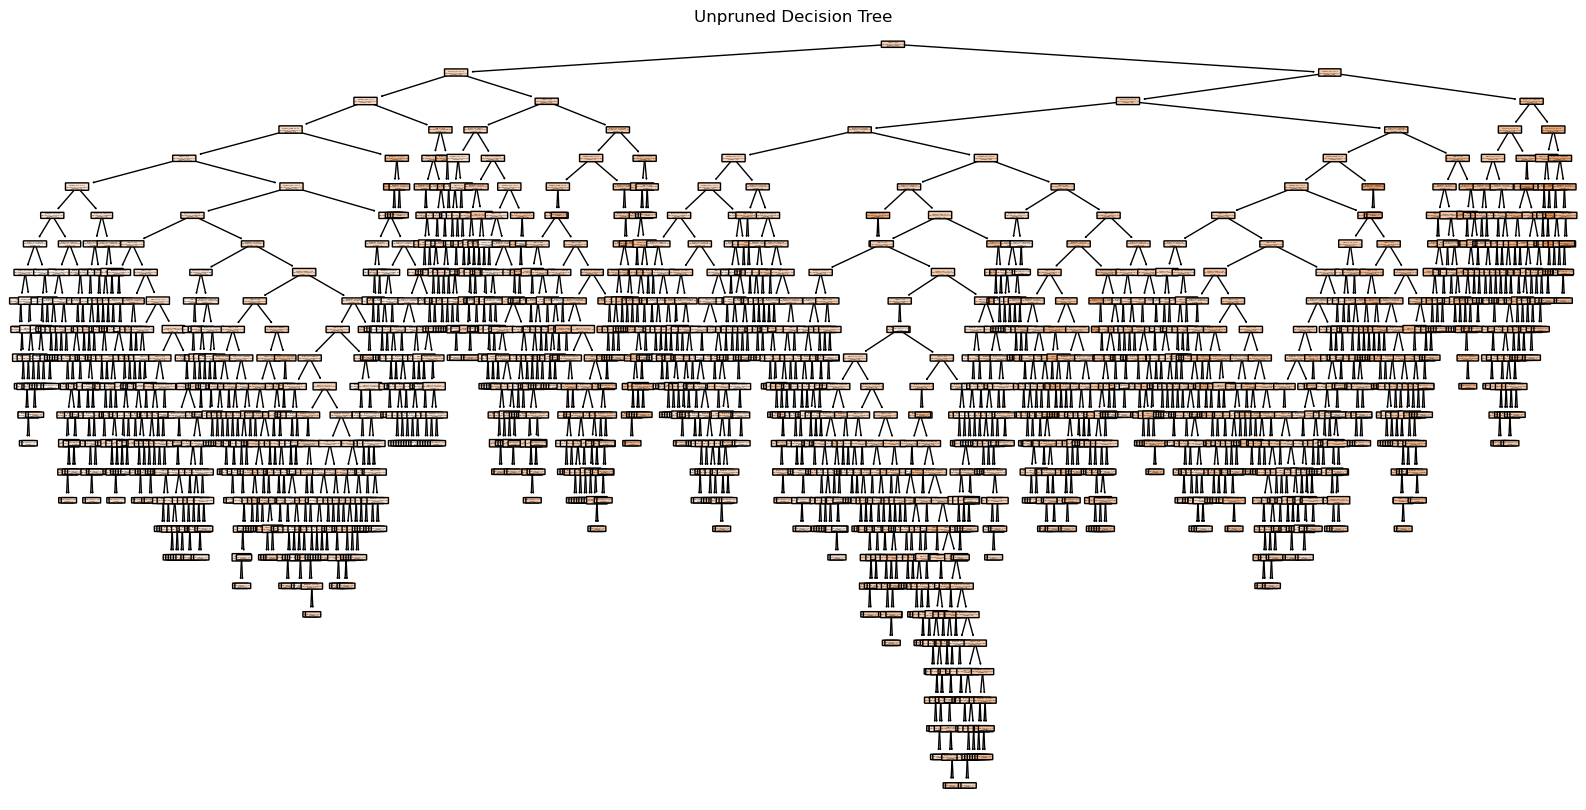

In [ ]:
# Plot the unpruned tree

plt.figure(figsize=(40,20))  
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Unpruned Decision Tree")
plt.show()

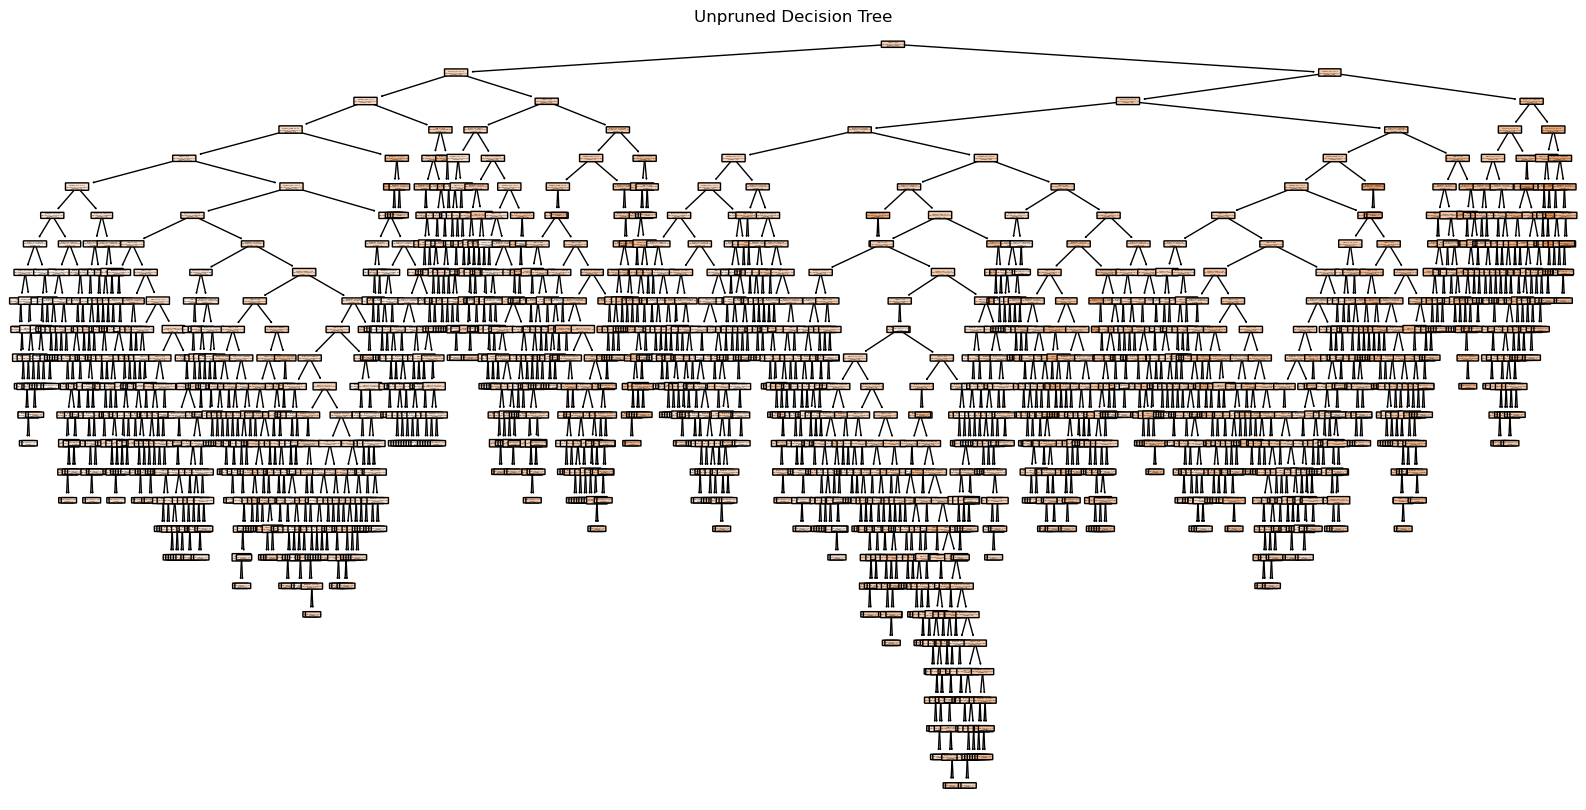

In [ ]:
# Replace "reg" with the variable name you chose in "Fit data to tree-based model" above

plt.figure(figsize=(40,20)) 
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.title("Unpruned Decision Tree")
plt.show()


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimal number of leaf nodes: 17


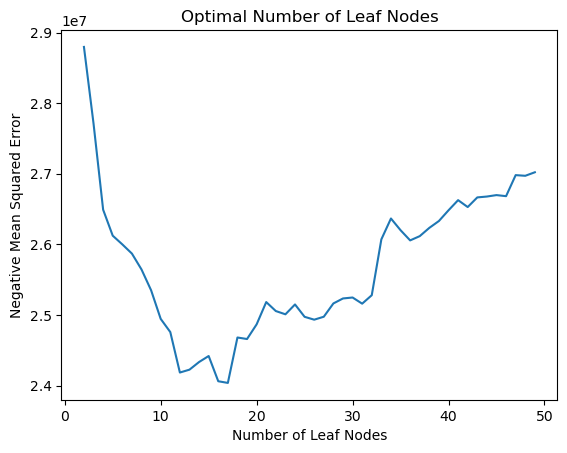

In [ ]:
# Finding the optimal number of leaf nodes
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define the parameter grid for max_leaf_nodes
param_grid = {'max_leaf_nodes': range(2, 50)}

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)

# Initialize GridSearchCV to find the optimal number of leaf nodes
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the optimal number of leaf nodes
optimal_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Optimal number of leaf nodes: {optimal_leaf_nodes}")

# Plot the performance vs. number of leaf nodes
plt.plot(param_grid['max_leaf_nodes'], -grid_search.cv_results_['mean_test_score'])
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Negative Mean Squared Error")
plt.title("Optimal Number of Leaf Nodes")
plt.show()

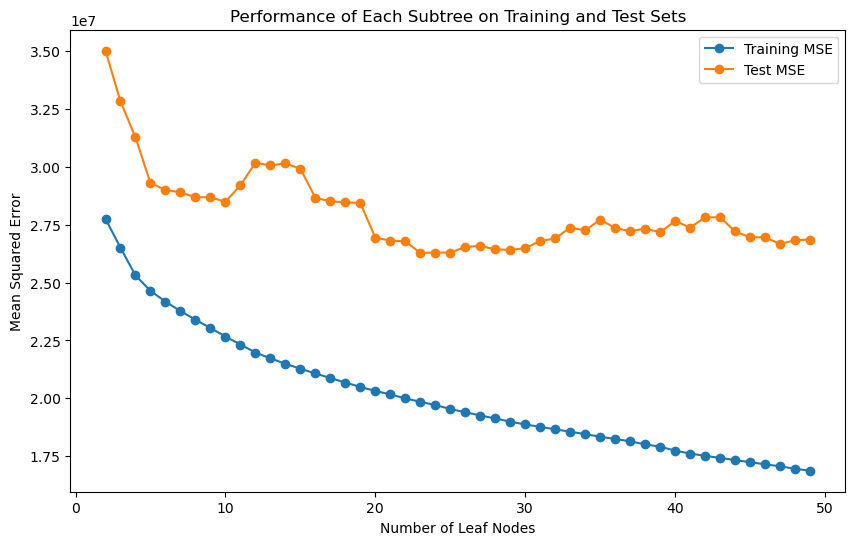

In [ ]:
# Visualise the performance of each subtree on the training and test set
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# the range for max_leaf_nodes
leaf_nodes = range(2, 50)

# lists to store the training and test errors
train_errors = []
test_errors = []

# Loop over the different values of max_leaf_nodes
for nodes in leaf_nodes:
    model = DecisionTreeRegressor(max_leaf_nodes=nodes, random_state=0)
    model.fit(X_train, y_train)
    
    # Predict on the training set and calculate the MSE
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)
    
    # Predict on the test set and calculate the MSE
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

# Plot the training and test MSE against the number of leaf nodes
plt.figure(figsize=(10, 6))
plt.plot(leaf_nodes, train_errors, label='Training MSE', marker='o')
plt.plot(leaf_nodes, test_errors, label='Test MSE', marker='o')
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Each Subtree on Training and Test Sets')
plt.legend()
plt.show()

In [ ]:
# Finding the optimal number of leaf nodes
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for max_leaf_nodes
param_grid = {'max_leaf_nodes': range(2, 50)}

# the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)

#  GridSearchCV to find the optimal number of leaf nodes
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the optimal number of leaf nodes
optimal_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Optimal number of leaf nodes: {optimal_leaf_nodes}")



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimal number of leaf nodes: 17


Fitting 5 folds for each of 48 candidates, totalling 240 fits


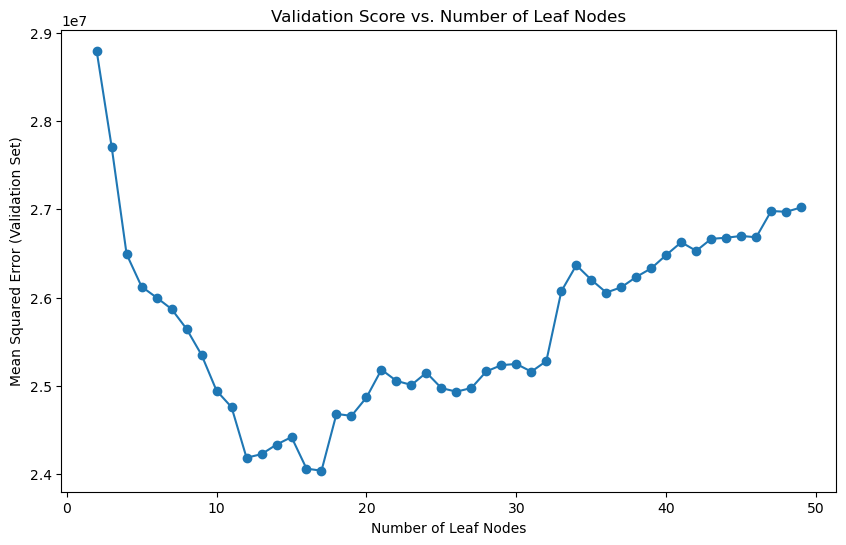

In [ ]:
# Visualise the validation score in relation to maximum leaf nodes
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for max_leaf_nodes
param_grid = {'max_leaf_nodes': range(2, 50)}

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)

# Initialize GridSearchCV to find the optimal number of leaf nodes
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Extract the mean test score (cross-validation results)
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Since GridSearchCV uses negative MSE, convert it back to positive MSE for visualization
mean_test_scores = -mean_test_scores

# Plot the validation score against the number of leaf nodes
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_leaf_nodes'], mean_test_scores, marker='o')
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Squared Error (Validation Set)')
plt.title('Validation Score vs. Number of Leaf Nodes')
plt.show()



In [ ]:
# Obtain the maximum leaf nodes with the highest validation score

# Define the parameter grid for max_leaf_nodes
param_grid = {'max_leaf_nodes': range(2, 50)}

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=0)

# Initialize GridSearchCV to find the optimal number of leaf nodes
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the optimal number of leaf nodes (i.e., the one with the highest validation score)
optimal_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
optimal_mse = -grid_search.best_score_

print(f"Optimal number of leaf nodes: {optimal_leaf_nodes}")
print(f"Highest validation score (lowest MSE): {round(optimal_mse, 2)}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimal number of leaf nodes: 17
Highest validation score (lowest MSE): 24038268.91


In [ ]:
# Use the optimum maximum leaf nodes to fit a parsimonious tree 
# Set random_state=0

# Using the optimal number of leaf nodes obtained from GridSearchCV
optimal_model = DecisionTreeRegressor(max_leaf_nodes=optimal_leaf_nodes, random_state=0)

# Fit the model to the training data
optimal_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimal = optimal_model.predict(X_test)

# Calculate the mean squared error for the parsimonious tree
optimal_mse = mean_squared_error(y_test, y_pred_optimal)
optimal_mse = round(optimal_mse, 2)

# Print the MSE for the parsimonious tree
print(f"Mean Squared Error with optimal max_leaf_nodes: {optimal_mse}")


Mean Squared Error with optimal max_leaf_nodes: 28513765.58


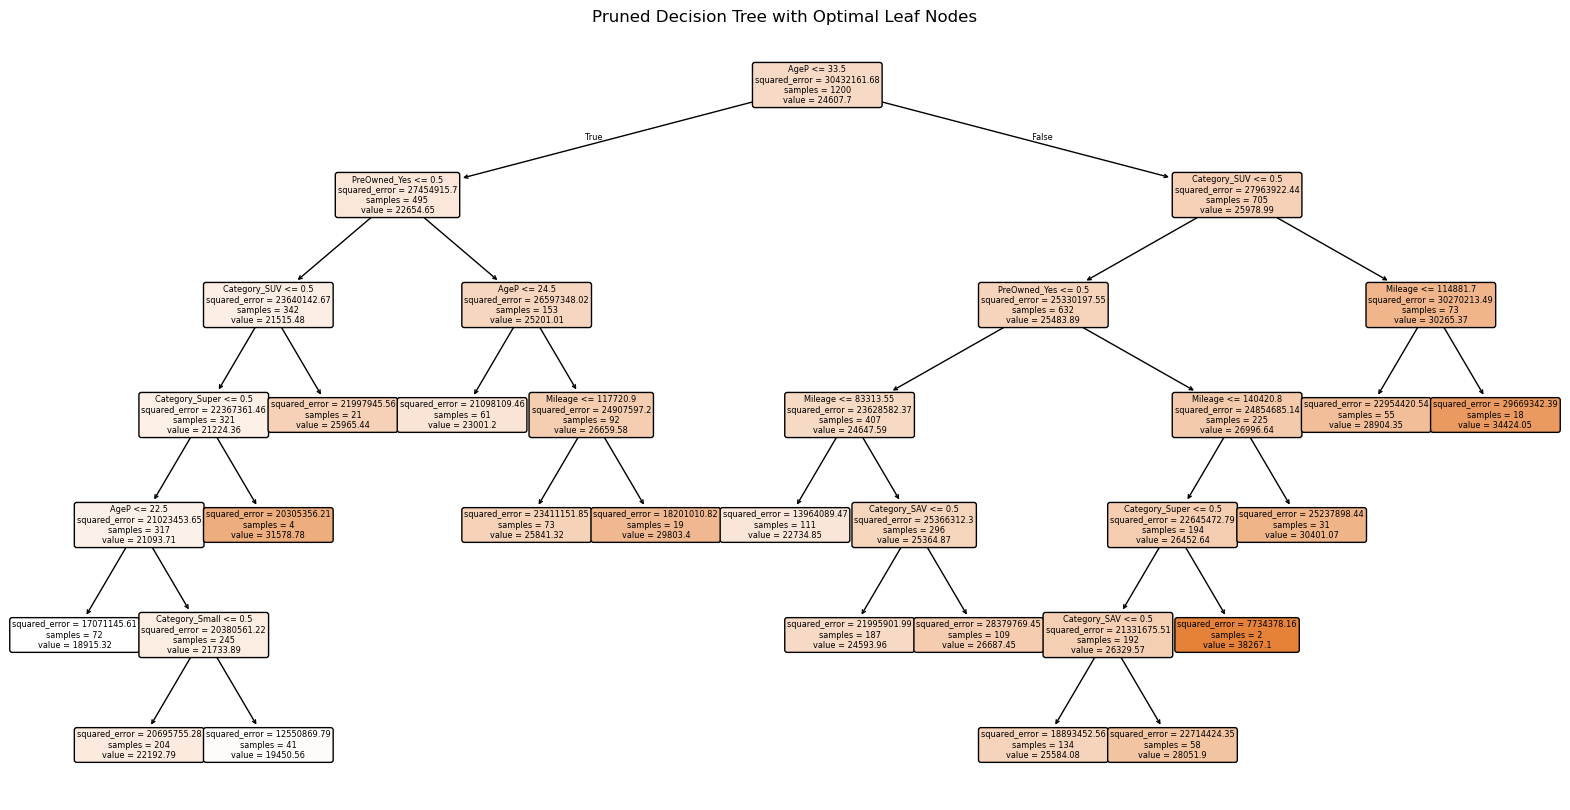

In [ ]:
# Visualise the smaller pruned tree

# Visualize the pruned tree
plt.figure(figsize=(20, 10))  
plot_tree(optimal_model, filled=True, rounded=True, feature_names=X.columns, precision=2)
plt.title("Pruned Decision Tree with Optimal Leaf Nodes")
plt.show()


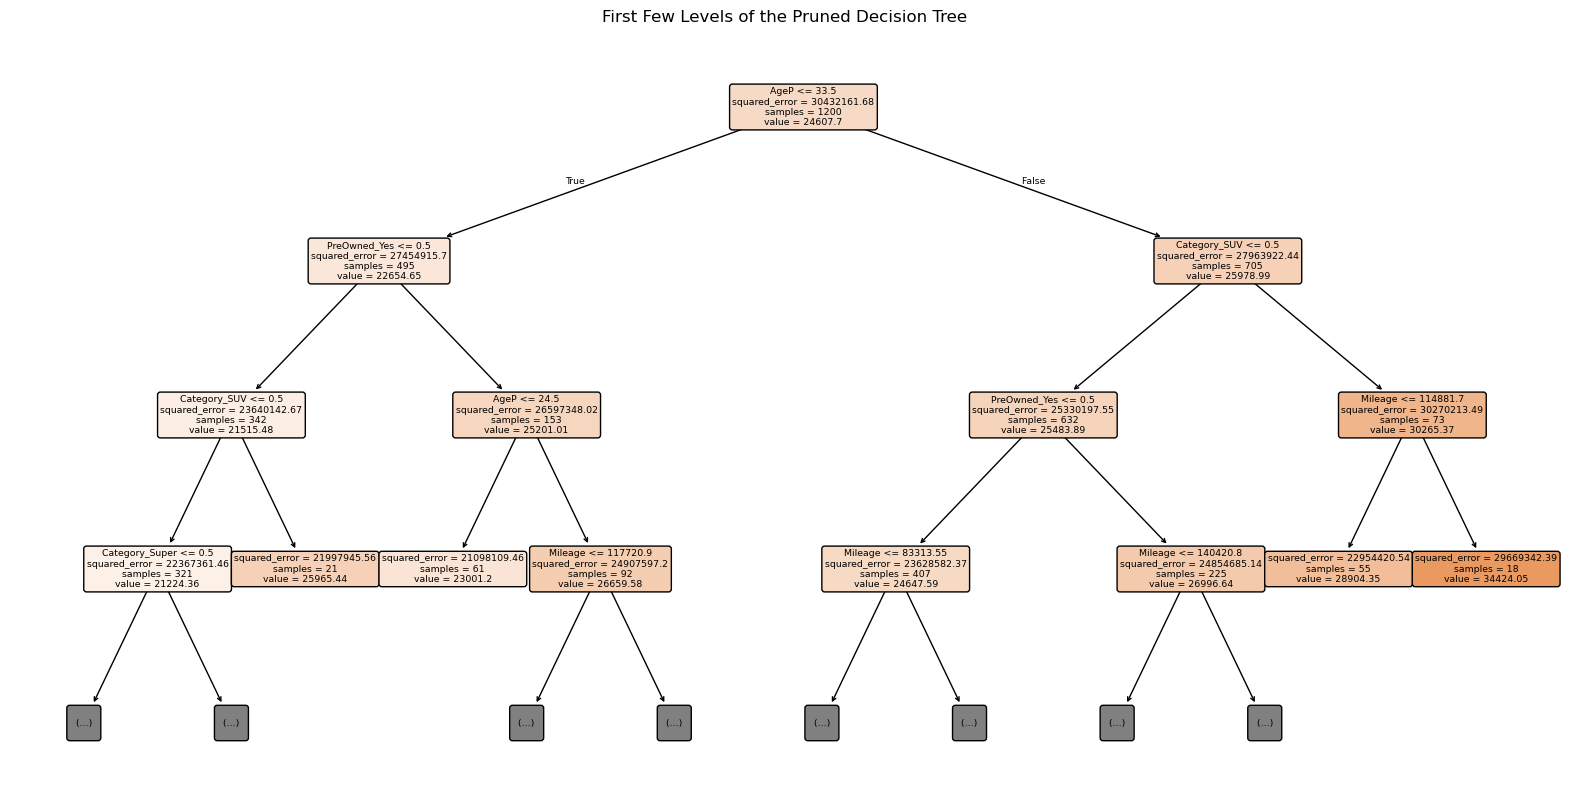

In [ ]:
# Show the first few levels of the tree

# Visualize the first few levels of the pruned tree
plt.figure(figsize=(20, 10))  
plot_tree(optimal_model, filled=True, rounded=True, feature_names=X.columns, precision=2, max_depth=3)
plt.title("First Few Levels of the Pruned Decision Tree")
plt.show()


1.  Recall the node to the left indicates that the above criterion is true while the node to the right indicates that it is false.
   * left = true
   * right = false
2. For nodes splitting on a categorical variable:
   * node left of `<= 0.5` = 0
   * node right of `<= 0.5` = 1

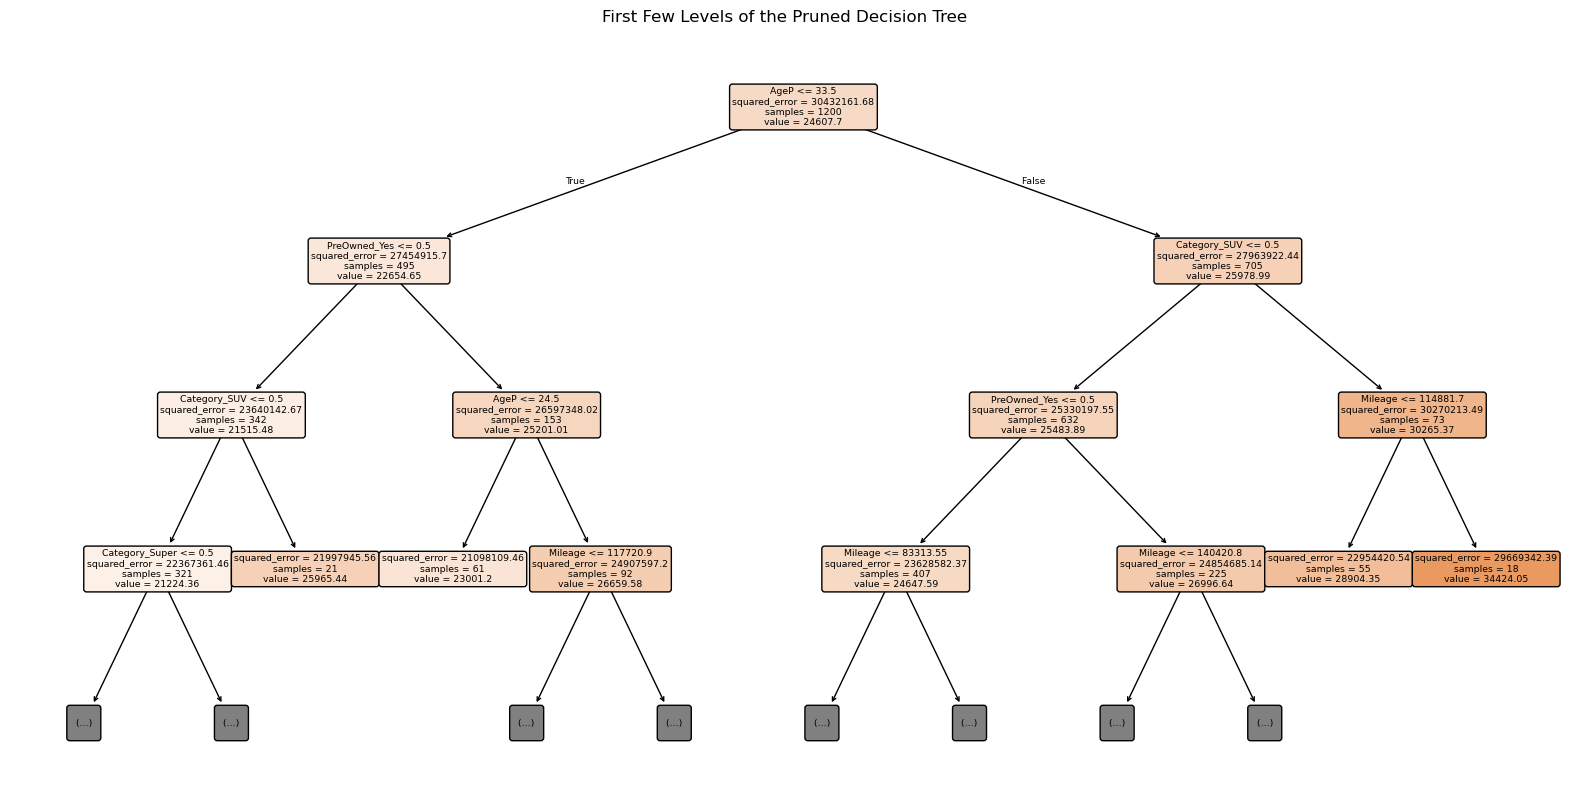

In [ ]:
# Save the plot as an image to read the information in the nodes
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first few levels of the pruned tree
plt.figure(figsize=(20, 10))  
plot_tree(optimal_model, filled=True, rounded=True, feature_names=X.columns, precision=2, max_depth=3)
plt.title("First Few Levels of the Pruned Decision Tree")

# Save the plot as an image file
plt.savefig(r'C:\Users\Utilisateur\Downloads\Assignment 1\Assignment 1.png', bbox_inches='tight', dpi=300)



In [ ]:
# Final test to see how the model performs: 
# Assign the MSE to the variable name "error2"
from sklearn.metrics import mean_squared_error

# Define the decision tree model
final_model = DecisionTreeRegressor()

# Train the model on the training set
final_model.fit(X_train, y_train)

# Make predictions on the test set using the final model
y_pred_final = final_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
error2 = mean_squared_error(y_test, y_pred_final)

# Round the MSE to 2 decimal places
error2 = round(error2, 2)

# Print the final MSE
print(f"Final Mean Squared Error: {error2}")




Final Mean Squared Error: 46372255.41


In [ ]:
# What is the final model to be used for predictions in future? 
# Set random_state=0

# Final model used for predictions
final_model = DecisionTreeRegressor(max_leaf_nodes=optimal_leaf_nodes, random_state=0)
final_model.fit(X_train, y_train)




DecisionTreeRegressor(max_leaf_nodes=17, random_state=0)


### Insight Questions from a Fitted Tree-Based Model 


1. You were asked to fit a tree-based model to this data set. Why do you think a tree-based model is more appropriate than a neural network in this scenario?

Answer: In the context of fitting a tree-based model versus a neural network for this dataset, a tree-based model might be more appropriate due to several factors:

- Decision trees are effective at capturing interactions between features without requiring extensive feature engineering. This is particularly useful when the relationships between features are complex or non-linear, which could be the case with factors affecting claim amounts.

- Tree-based models handle both numerical and categorical features well and do not require normalization or scaling of features. They can also manage missing values effectively, which is beneficial if the dataset contains such values.

- Neural networks, especially deep ones, can be computationally intensive and require significant time and resources for training. For datasets with fewer features or smaller sample sizes, a tree-based model might be more practical and efficient.


2. Use the decision tree image you generated to gain insight into the factors that affect the claim amount. Start by looking at the first split of the decision tree, and recommending a course of action with regard to the age of the driver. Choose two more nodes to interpret, and comment on the impact the output could have on premiums.



1. Node: Vehicle Type = SUV

The decision tree indicates that SUVs lead to higher claim amounts compared to Sedans, this could mean that vehicle type significantly impacts the cost of claims. SUVs might be involved in more severe accidents or cost more to repair, leading to higher claims. 

Insurance companies could adjust premiums based on the vehicle type, charging more for SUVs and potentially less for other vehicle types. This adjustment would reflect the higher risk associated with insuring certain vehicle types.

2. Node: Preowned vehicles = Yes

Th decision tree indicates that pre-owned vehicles are associated with higher claims compared to new vehicles, this is significant.

Pre-owned vehicles might have a higher likelihood of mechanical issues or might be involved in more accidents, leading to higher claims. 

These vehicles might be older or have a more extensive history of use, increasing the probability of claims. 

Insurance companies could consider higher premiums for pre-owned vehicles due to the increased risk of higher claims. This would account for the potential added risk of insuring older or more heavily used vehicles. 

In [1]:
!jupyter nbconvert --to pdf DSA_Assignment_Notebook.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'DSA_Assignment_Notebook.ipynb' matched no files


#### The End!